In [18]:
# Import required modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

In [27]:
# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset from a CSV file (replace 'your_dataset.csv' with your actual file name)
data = pd.read_csv('TrainingDataStand.csv')


In [28]:

# Separate input features (first 4 columns) and output (5th column)
X = data.iloc[:, :5].values  # First 4 columns as input features
y = data.iloc[:, 5].values   # 5th column as output

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [30]:
# Split into curvature and error groups
cCols = ["curvature", "lookAhead1"]
cCols = [1, 3]
X_train_c = X_train[:, cCols]
X_val_c = X_val[:, cCols]
X_test_c = X_test[:, cCols]

eCols = ["CTE", "Heading Error"]
eCols = [0, 2]
X_train_e = X_train[:, eCols]
X_val_e = X_val[:, eCols]
X_test_e = X_test[:, eCols]

In [31]:
# Define input layers
curvature_input = Input(shape=(2,), name="Curvature_LA_Curvature")  # Primary Features
error_input = Input(shape=(2,), name="CTE_HE")  # Correction Features

# Primary steering decision (based on track curvature)
curvature_layer = Dense(16, activation="relu")(curvature_input)
curvature_layer = Dense(8, activation="relu")(curvature_layer)

# Correction-based steering adjustments
error_layer = Dense(8, activation="relu")(error_input)
error_layer = Dense(4, activation="relu")(error_layer)

# Merge both processed features
merged = Concatenate()([curvature_layer, error_layer])

# Final output layer
output_layer = Dense(1, activation="linear", name="Steering")(merged)

# Define model
model = Model(inputs=[curvature_input, error_input], outputs=output_layer)

In [32]:
# Start the timer
start_time = time.time()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    [X_train_c, X_train_e], y_train,
    validation_data=([X_val_c, X_val_e], y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Stop the timer
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Training Time: {elapsed_time:.2f} seconds")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Curvature_LA_Curva… │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CTE_HE (InputLayer) │ (None, 2)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 16)        │         48 │ Curvature_LA_Cur… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 8)         │         24 │ CTE_HE[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 8)         │        136 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 4)         │         36 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 12)        │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Steering (Dense)    │ (None, 1)         │         13 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0024 - mae: 0.0287 - val_loss: 0.0015 - val_mae: 0.0251
Epoch 2/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0015 - mae: 0.0251 - val_loss: 0.0014 - val_mae: 0.0247
Epoch 3/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.0015 - mae: 0.0248 - val_loss: 0.0014 - val_mae: 0.0246
Epoch 4/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0014 - mae: 0.0247 - val_loss: 0.0014 - val_mae: 0.0244
Epoch 5/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0014 - mae: 0.0246 - val_loss: 0.0014 - val_mae: 0.0244
Epoch 6/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0014 - mae: 0.0245 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 7/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.0014 - mae: 0.0244 - val_loss: 0.0014 - val_mae: 0.0243
Epoch 8/50
15127/15127 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0014 - mae: 0.0244 - val_loss: 0.0014 - val_mae: 0.0242
Epoch 9/50
15127

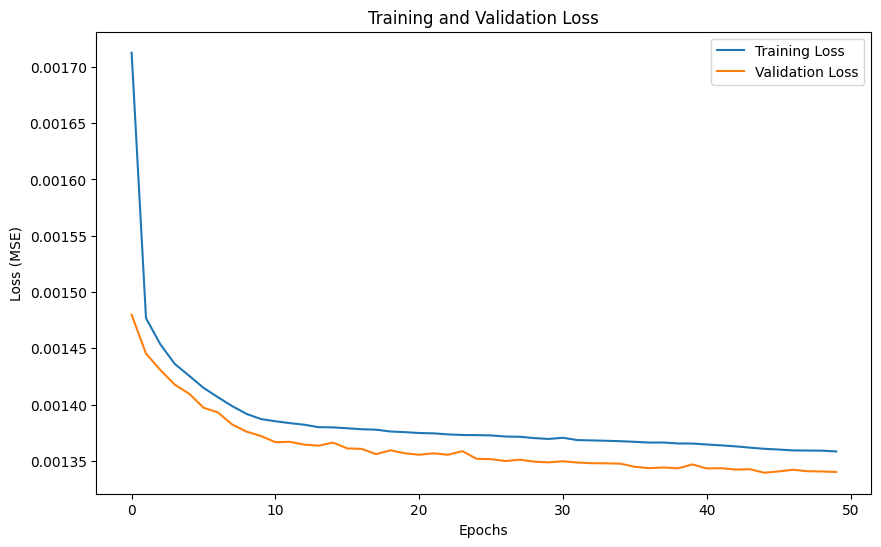

3242/3242 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


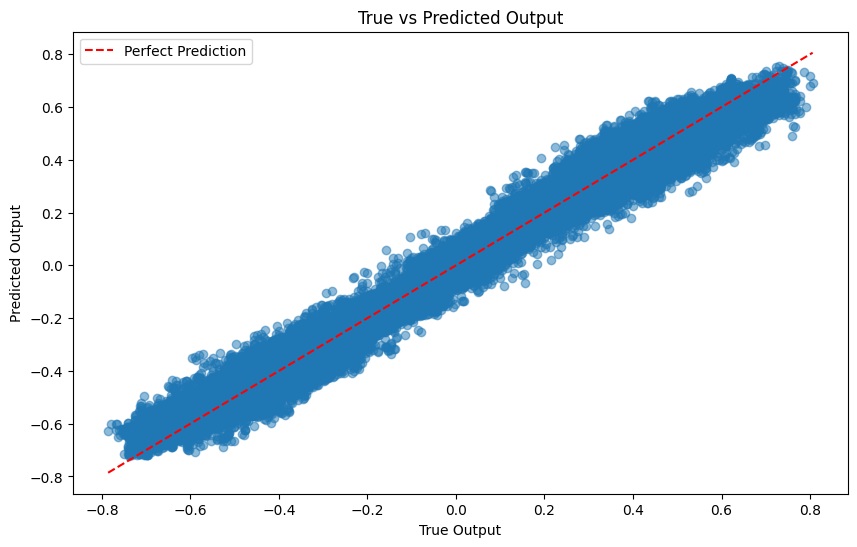

In [33]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Predict on test set and visualize results
y_pred = model.predict([X_test_c, X_test_e])
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True vs Predicted Output')
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.show()

In [34]:
# Export the model
model.export("SteeringModel_Iteration68")

INFO:tensorflow:Assets written to: SteeringModel_Iteration68\assets


INFO:tensorflow:Assets written to: SteeringModel_Iteration68\assets


Saved artifact at 'SteeringModel_Iteration68'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 2), dtype=tf.float32, name='Curvature_LA_Curvature'), TensorSpec(shape=(None, 2), dtype=tf.float32, name='CTE_HE')]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1569037735248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1569037733904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1569037735440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1569037732944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1569037735824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1569037743120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1569037734288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568700127504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568700122704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1568700121744: TensorSpec

In [36]:
# Feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(model, [X_test_c, X_test_e], y_test, scoring='neg_mean_absolute_error')
feature_importance = result.importances_mean
print("Feature Importance:", feature_importance)

ValueError: Found array with dim 3. None expected <= 2.

In [17]:
from tensorflow.keras.utils import plot_model

# Generate and save the model architecture visualization
plot_model(model, show_shapes=True, show_layer_names=True, to_file="ffnn_hierarchy.png")

print("Model visualization saved as ffnn_hierarchy.png")

You must install pydot (`pip install pydot`) for `plot_model` to work.
Model visualization saved as ffnn_hierarchy.png
